# Automated Crypto Prices Data

In [1]:
# Testing out CoinMarketCap's API
# Copy code from the documentation
# Change target url
# Change X-CMC_PRO_API_KEY to your generated key

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '8907ae51-9ef1-4a24-8136-31a3d649cf7b',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-01-15T20:01:22.449Z', 'error_code': 0, 'error_message': None, 'elapsed': 24, 'credit_count': 1, 'notice': None, 'total_count': 8705}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10707, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
# Data type should output dictionary
type(data)

dict

In [3]:
# View the data using pandas
# Normalize the data into a data frame
# Add a timestamp column for when you generate this data

import pandas as pd

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10707,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.959945e+07,1.959945e+07,...,49.8831,9.020284e+11,None,2024-01-15T20:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-15 15:01:22.677043
1,1027,Ethereum,ETH,ethereum,8248,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201808e+08,1.201808e+08,...,18.0349,3.043728e+11,None,2024-01-15T20:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-15 15:01:22.677043
2,825,Tether USDt,USDT,tether,71380,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,9.501084e+10,9.860296e+10,...,5.6261,9.854035e+10,None,2024-01-15T19:59:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-01-15 15:01:22.677043
3,1839,BNB,BNB,bnb,2008,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.516895e+08,1.516895e+08,...,2.8585,4.824228e+10,None,2024-01-15T19:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-15 15:01:22.677043
4,5426,Solana,SOL,solana,614,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.326843e+08,5.672291e+08,...,2.4603,5.444315e+10,None,2024-01-15T20:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-15 15:01:22.677043
5,52,XRP,XRP,xrp,1199,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.426682e+10,9.998801e+10,...,1.8663,5.804188e+10,None,2024-01-15T20:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-15 15:01:22.677043
6,3408,USDC,USDC,usd-coin,16211,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.547832e+10,2.547832e+10,...,1.5098,2.548059e+10,None,2024-01-15T19:59:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-01-15 15:01:22.677043
7,2010,Cardano,ADA,cardano,1024,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.539522e+10,3.652824e+10,...,1.1195,2.402000e+10,None,2024-01-15T19:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-15 15:01:22.677043
8,5805,Avalanche,AVAX,avalanche,636,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capital-p...",7.200000e+08,3.666486e+08,4.346815e+08,...,0.7892,2.615510e+10,None,2024-01-15T19:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-15 15:01:22.677043
9,74,Dogecoin,DOGE,dogecoin,873,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.426660e+11,1.426660e+11,...,0.6858,1.157473e+10,None,2024-01-15T20:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-15 15:01:22.677043


In [4]:
# Created a function of calling the API to generate a csv file
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
        'start':'1',
        'limit':'15',
        'convert':'USD'
    }
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': '8907ae51-9ef1-4a24-8136-31a3d649cf7b',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
    #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)
        
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    #df_append = pd.DataFrame(df2)
    df
    
    if not os.path.isfile(r'/Users/pratik/Desktop/Projects/python_web_scraper/crypto_scraper/cmc_data.csv'):
        df.to_csv(r'/Users/pratik/Desktop/Projects/python_web_scraper/crypto_scraper/cmc_data.csv', header = 'column_names')
    else:
        df.to_csv(r'/Users/pratik/Desktop/Projects/python_web_scraper/crypto_scraper/cmc_data.csv', mode = 'a', header=False)

In [5]:
# Running the function
import os
from time import time
from time import sleep

for i in range(333): #333 is number of times we call the API.
    api_runner()
    print('API runner completed successfully')
    sleep(60) #sleep for 1 minute
exit()

API runner completed successfully
API runner completed successfully
API runner completed successfully
API runner completed successfully
API runner completed successfully


KeyboardInterrupt: 

In [6]:
# Look at the newly generated csv
cmc_data = pd.read_csv(r'/Users/pratik/Desktop/Projects/python_web_scraper/crypto_scraper/cmc_data.csv')
cmc_data

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10707,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.959941e+07,...,49.8085,8.959291e+11,NaN,2024-01-15T17:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-15 12:30:36.340463
1,1,1027,Ethereum,ETH,ethereum,8248,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.201808e+08,...,18.1260,3.042963e+11,NaN,2024-01-15T17:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-15 12:30:36.340463
2,2,825,Tether USDt,USDT,tether,71372,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,9.501084e+10,...,5.6575,9.856833e+10,NaN,2024-01-15T17:28:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-01-15 12:30:36.340463
3,3,1839,BNB,BNB,bnb,2008,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.516896e+08,...,2.8667,4.812637e+10,NaN,2024-01-15T17:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-15 12:30:36.340463
4,4,5426,Solana,SOL,solana,614,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.326845e+08,...,2.4489,5.392630e+10,NaN,2024-01-15T17:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-15 12:30:36.340463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,10,6636,Polkadot,DOT,polkadot-new,661,2020-08-19T00:00:00.000Z,"['substrate', 'polkadot', 'binance-chain', 'po...",NaN,1.295730e+09,...,0.5853,1.067569e+10,NaN,2024-01-15T20:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-15 15:05:23.571957
311,11,1958,TRON,TRX,tron,897,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'layer...",NaN,8.822954e+10,...,0.5849,9.875523e+09,NaN,2024-01-15T20:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-15 15:05:23.571957
312,12,1975,Chainlink,LINK,chainlink,1568,2017-09-20T00:00:00.000Z,"['platform', 'defi', 'oracles', 'smart-contrac...",1.000000e+09,5.681000e+08,...,0.5162,1.534206e+10,NaN,2024-01-15T20:03:00.000Z,1027.0,Ethereum,ETH,ethereum,0x514910771af9ca656af840dff83e8264ecf986ca,2024-01-15 15:05:23.571957
313,13,11419,Toncoin,TON,toncoin,187,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-estate', 'd...",NaN,3.456769e+09,...,0.4999,1.245479e+10,NaN,2024-01-15T20:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-15 15:05:23.571957


In [7]:
# Changing the scientific notation to floating numbers
pd.set_option('display.float_format', lambda x: '%.5f' % x)

cmc_data


,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10707,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19599406.00000,...,49.80850,895929139832.06995,NaN,2024-01-15T17:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-15 12:30:36.340463
1,1,1027,Ethereum,ETH,ethereum,8248,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120180819.14964,...,18.12600,304296348029.78998,NaN,2024-01-15T17:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-15 12:30:36.340463
2,2,825,Tether USDt,USDT,tether,71372,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,95010835095.95918,...,5.65750,98568334358.84000,NaN,2024-01-15T17:28:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-01-15 12:30:36.340463
3,3,1839,BNB,BNB,bnb,2008,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,151689561.18802,...,2.86670,48126371810.05000,NaN,2024-01-15T17:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-15 12:30:36.340463
4,4,5426,Solana,SOL,solana,614,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,432684519.47139,...,2.44890,53926304256.91000,NaN,2024-01-15T17:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-15 12:30:36.340463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,10,6636,Polkadot,DOT,polkadot-new,661,2020-08-19T00:00:00.000Z,"['substrate', 'polkadot', 'binance-chain', 'po...",NaN,1295729977.34499,...,0.58530,10675688591.19000,NaN,2024-01-15T20:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-15 15:05:23.571957
311,11,1958,TRON,TRX,tron,897,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'layer...",NaN,88229536908.80948,...,0.58490,9875522619.33000,NaN,2024-01-15T20:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-15 15:05:23.571957
312,12,1975,Chainlink,LINK,chainlink,1568,2017-09-20T00:00:00.000Z,"['platform', 'defi', 'oracles', 'smart-contrac...",1000000000.00000,568099970.45279,...,0.51620,15342058710.48000,NaN,2024-01-15T20:03:00.000Z,1027.00000,Ethereum,ETH,ethereum,0x514910771af9ca656af840dff83e8264ecf986ca,2024-01-15 15:05:23.571957
313,13,11419,Toncoin,TON,toncoin,187,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-estate', 'd...",NaN,3456768549.94656,...,0.49990,12454790064.74000,NaN,2024-01-15T20:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-15 15:05:23.571957


In [8]:
# Only taking a look at the percent change columns
df2 = cmc_data.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df2

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.39826,-0.25705,-6.68493,0.68955,17.53224,50.22601
Ethereum,0.28442,0.35107,10.08211,12.74526,26.73651,61.49368
Tether USDt,0.00422,-0.01733,-0.12301,0.01108,-0.05759,-0.09600
BNB,0.14800,3.89620,4.67614,28.99230,28.91358,49.92431
Solana,0.85006,-4.39829,-1.10583,26.13038,52.78063,295.79045
XRP,0.41123,-0.59617,0.81580,-7.42033,-7.62560,17.19357
USDC,0.00112,0.00819,0.00872,0.01074,0.02296,0.02115
Cardano,0.34350,-2.75514,1.68533,-14.46379,39.51981,113.92100
Avalanche,1.14450,-2.21871,4.12727,-17.46564,60.30953,297.57181


In [9]:
# Want to graph percent change columns, so we need to 'pivot' the data. We will use the stack function. 
df3= df2.stack()
df3

name                                 
Bitcoin  quote.USD.percent_change_1h     0.39826
         quote.USD.percent_change_24h   -0.25705
         quote.USD.percent_change_7d    -6.68493
         quote.USD.percent_change_30d    0.68955
         quote.USD.percent_change_60d   17.53224
                                          ...   
Polygon  quote.USD.percent_change_24h   -1.67511
         quote.USD.percent_change_7d     3.63617
         quote.USD.percent_change_30d   -1.33404
         quote.USD.percent_change_60d   -3.25421
         quote.USD.percent_change_90d   63.05199
Length: 90, dtype: float64

In [10]:
type(df3)

pandas.core.series.Series

In [11]:
# Named the column 'values'

df4 = df3.to_frame(name = 'values')
df4

values
name                                         
Bitcoin quote.USD.percent_change_1h   0.39826
        quote.USD.percent_change_24h -0.25705
        quote.USD.percent_change_7d  -6.68493
        quote.USD.percent_change_30d  0.68955
        quote.USD.percent_change_60d 17.53224
...                                       ...
Polygon quote.USD.percent_change_24h -1.67511
        quote.USD.percent_change_7d   3.63617
        quote.USD.percent_change_30d -1.33404
        quote.USD.percent_change_60d -3.25421
        quote.USD.percent_change_90d 63.05199

[90 rows x 1 columns]

In [12]:
#type(df4)

df4.count()

values    90
dtype: int64

In [13]:
# Added an index

index = pd.Index(range(90))


df4 = df4.reset_index()
df4

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.39826
1,Bitcoin,quote.USD.percent_change_24h,-0.25705
2,Bitcoin,quote.USD.percent_change_7d,-6.68493
3,Bitcoin,quote.USD.percent_change_30d,0.68955
4,Bitcoin,quote.USD.percent_change_60d,17.53224
...,...,...,...
85,Polygon,quote.USD.percent_change_24h,-1.67511
86,Polygon,quote.USD.percent_change_7d,3.63617
87,Polygon,quote.USD.percent_change_30d,-1.33404
88,Polygon,quote.USD.percent_change_60d,-3.25421


In [14]:
# Renamed 'level_1' to 'percent_change'

df4 = df4.rename(columns = {'level_1': 'percent_change'})
df4 

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.39826
1,Bitcoin,quote.USD.percent_change_24h,-0.25705
2,Bitcoin,quote.USD.percent_change_7d,-6.68493
3,Bitcoin,quote.USD.percent_change_30d,0.68955
4,Bitcoin,quote.USD.percent_change_60d,17.53224
...,...,...,...
85,Polygon,quote.USD.percent_change_24h,-1.67511
86,Polygon,quote.USD.percent_change_7d,3.63617
87,Polygon,quote.USD.percent_change_30d,-1.33404
88,Polygon,quote.USD.percent_change_60d,-3.25421


In [15]:
# Rename row values to a simpler name

df4['percent_change'] = df4['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df4

,name,percent_change,values
0,Bitcoin,1h,0.39826
1,Bitcoin,24h,-0.25705
2,Bitcoin,7d,-6.68493
3,Bitcoin,30d,0.68955
4,Bitcoin,60d,17.53224
...,...,...,...
85,Polygon,24h,-1.67511
86,Polygon,7d,3.63617
87,Polygon,30d,-1.33404
88,Polygon,60d,-3.25421


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(54.282375, 0.5, 'Values')

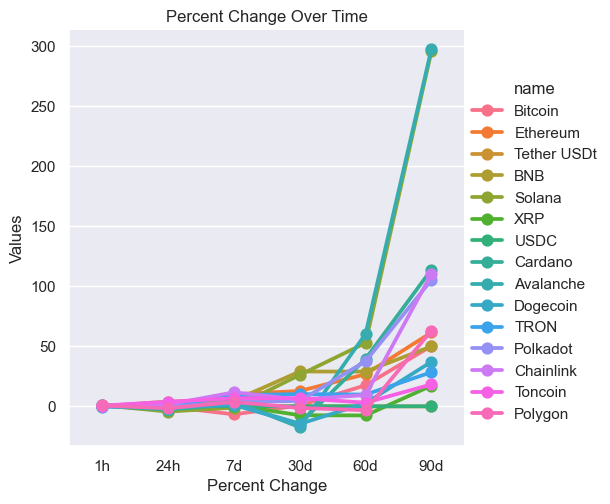

In [34]:
# Graphing percent change of each coin 

sns.catplot(x = 'percent_change', y = 'values', hue = 'name', data=df4, kind = 'point')
plt.title('Percent Change Over Time')
plt.xlabel('Percent Change')
plt.ylabel('Values')

In [30]:
# Only want to look at Bitcoin

simplified_data = cmc_data[['name','quote.USD.price','timestamp']]
bitcoin_data = simplified_data.query("name == 'Bitcoin'")
bitcoin_data

,name,quote.USD.price,timestamp
0,Bitcoin,42663.29237,2024-01-15 12:30:36.340463
15,Bitcoin,42671.70820,2024-01-15 12:31:36.510704
30,Bitcoin,42663.67978,2024-01-15 12:32:36.712541
45,Bitcoin,42663.67978,2024-01-15 12:33:36.913319
60,Bitcoin,42669.27190,2024-01-15 12:34:37.115589
75,Bitcoin,42688.22006,2024-01-15 12:35:37.306248
90,Bitcoin,42684.49810,2024-01-15 12:36:37.532700
105,Bitcoin,42684.14639,2024-01-15 12:37:37.747794
120,Bitcoin,42677.64880,2024-01-15 12:38:37.943645
135,Bitcoin,42658.81005,2024-01-15 12:39:38.160208


Text(0, 0.5, 'Bitcoin Price (USD)')

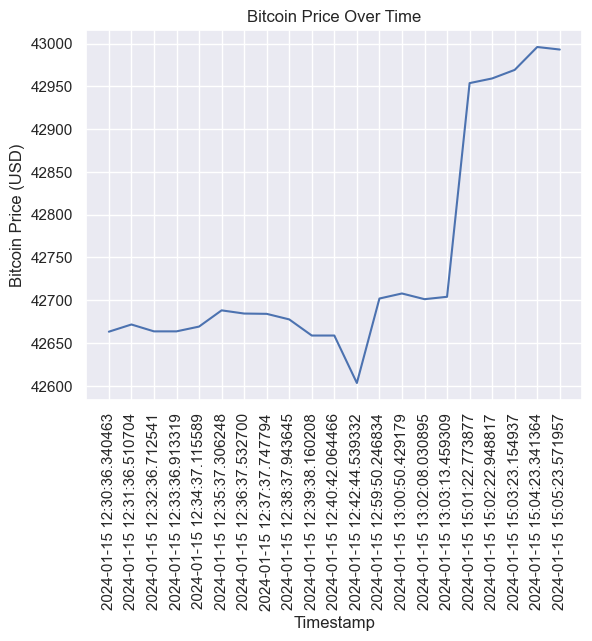

In [33]:
# Plotting Bitcoin Price Over Time

sns.set_theme(style='darkgrid')

sns.lineplot(x='timestamp', y='quote.USD.price', data=bitcoin_data)
plt.xticks(rotation=90)
plt.title('Bitcoin Price Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Bitcoin Price (USD)')